# 📌 Assignment: Model Optimization and Performance Tuning

# 🚀 Solve It Yourself!

This assignment is your chance to think like a data scientist. Don’t rely on AI to do the work for you — the real learning happens when you explore, experiment, and problem-solve.

Mistakes are okay — they’re part of the journey. Trust your skills, stay curious, and give it your best shot.

You’ve got this! 💪

## 🎯 Objective:

- Explore Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree (with CCP Post-Pruning), and Random Forest.
- Optimize and compare model performance.

## 📌 Hint:

- Make a result dataframe to append to it model name and performance metrics for final comparison (use visualization as well).
---

## 📝 Part 1: Data Preparation
1. **Download a dataset from Kagglehub**.
2. **Load the dataset** and inspect its structure (columns, types, missing values).
3. **Preprocess the data:**
   - Handle missing values
   - Encode categorical variables
   - Scale numeric features

👉 **Question:** What preprocessing steps did you apply, and why?

In [46]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wenruliu/adult-income-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/mac/.cache/kagglehub/datasets/wenruliu/adult-income-dataset/versions/2


In [2]:
ls /Users/mac/.cache/kagglehub/datasets/wenruliu/adult-income-dataset/versions/2


adult.csv


In [3]:
import os
import pandas as pd

data_name = os.listdir(path)[0]

full_path = os.path.join(path,data_name)

df = pd.read_csv('/Users/mac/.cache/kagglehub/datasets/wenruliu/adult-income-dataset/versions/2/adult.csv')


In [4]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.shape

(48842, 15)

In [7]:
df.duplicated().sum()


52

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
# Replace ? with NaN
df = df.replace('?', np.nan)

In [11]:
# Check missing values
df.isnull().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

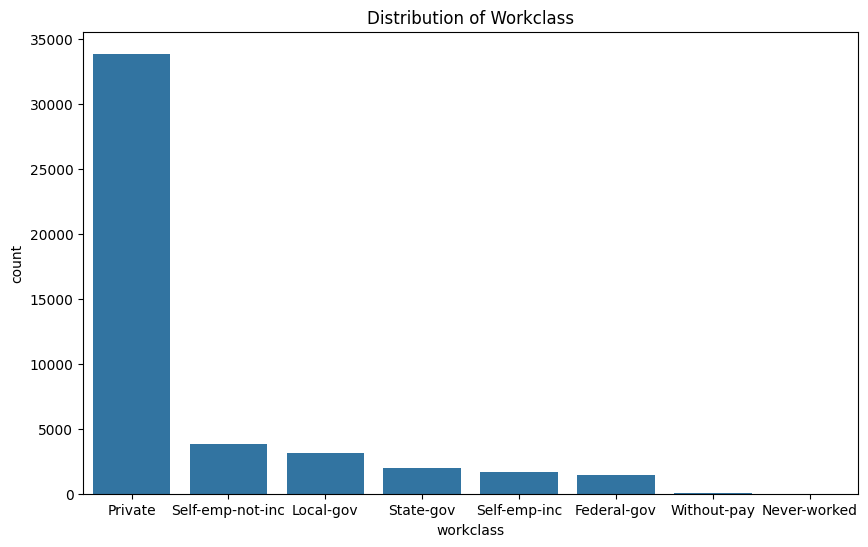

In [12]:
# Plot workclass distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', order=df['workclass'].value_counts().index, data=df)
plt.title('Distribution of Workclass')
plt.show()

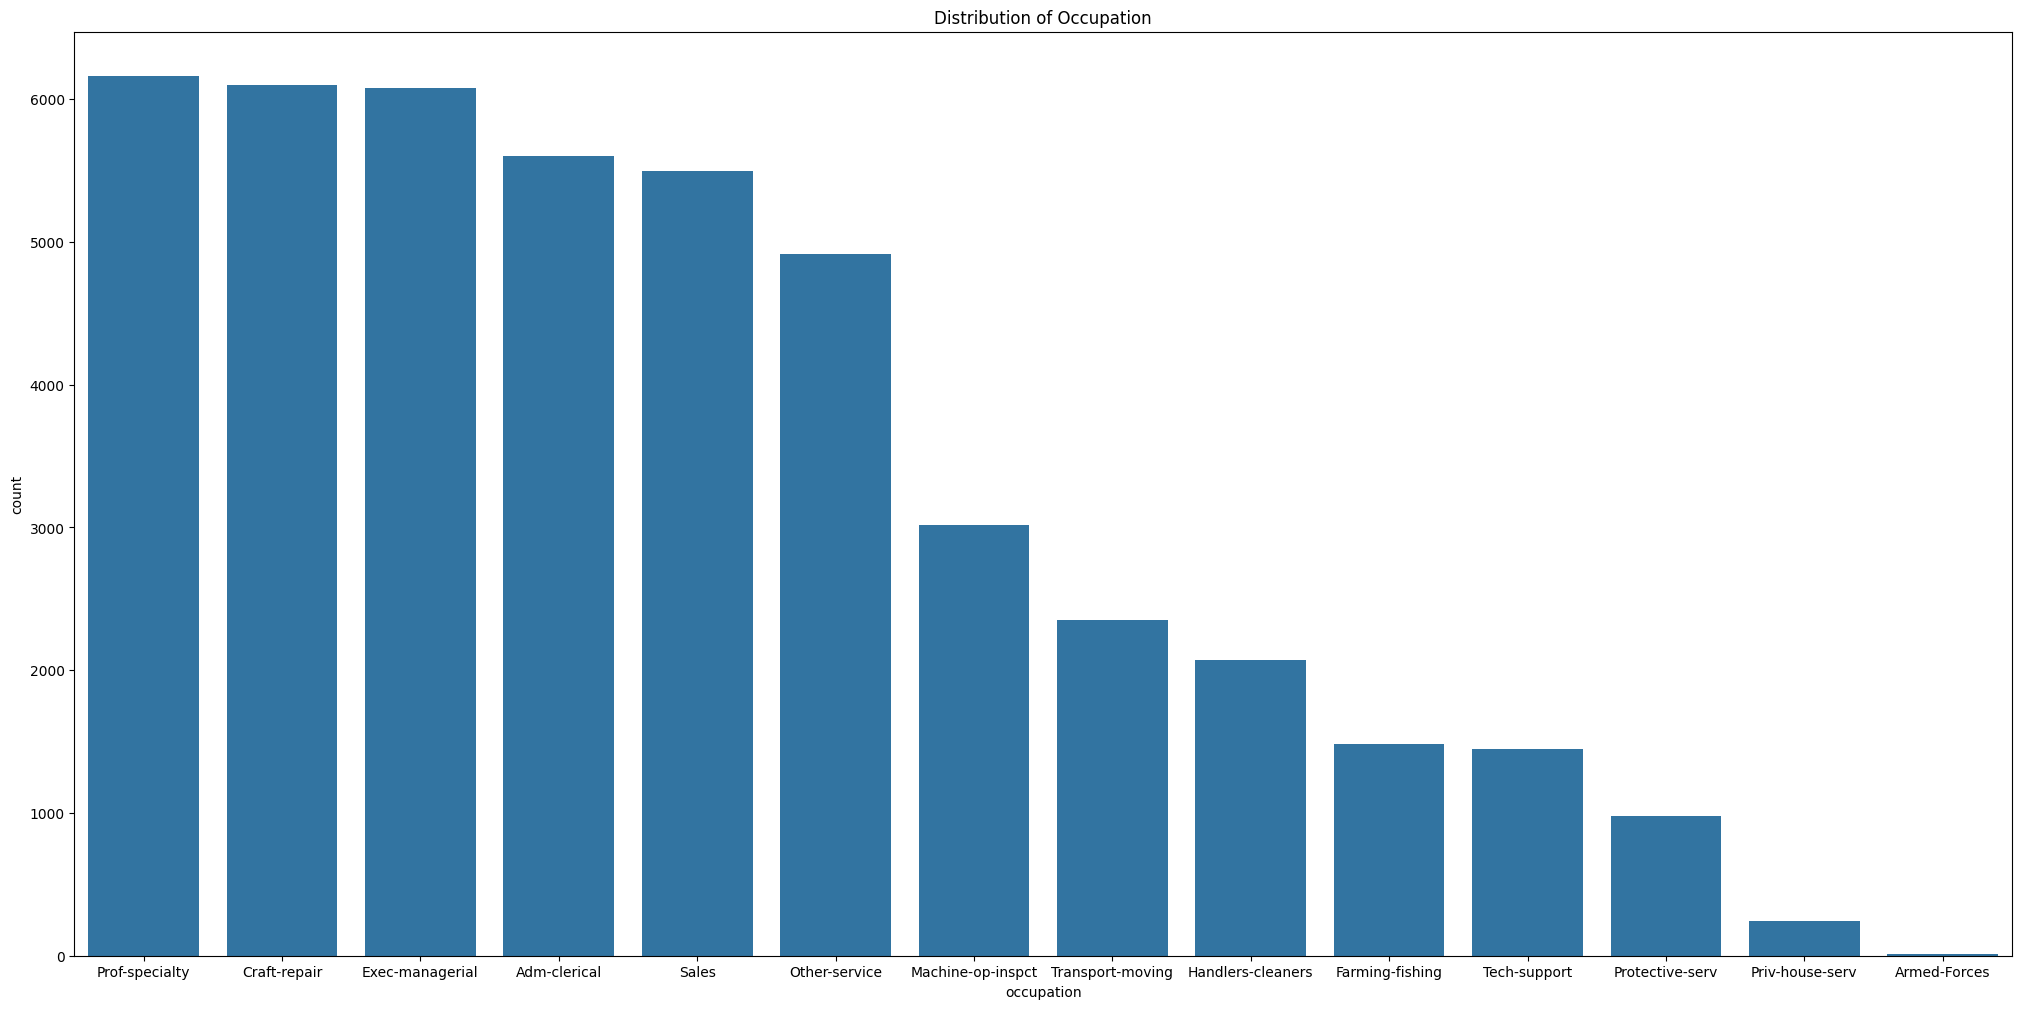

In [13]:
# Plot occupation distribution
plt.figure(figsize=(25, 12))
sns.countplot(x='occupation', order=df['occupation'].value_counts().index, data=df)
plt.title('Distribution of Occupation')
plt.show()

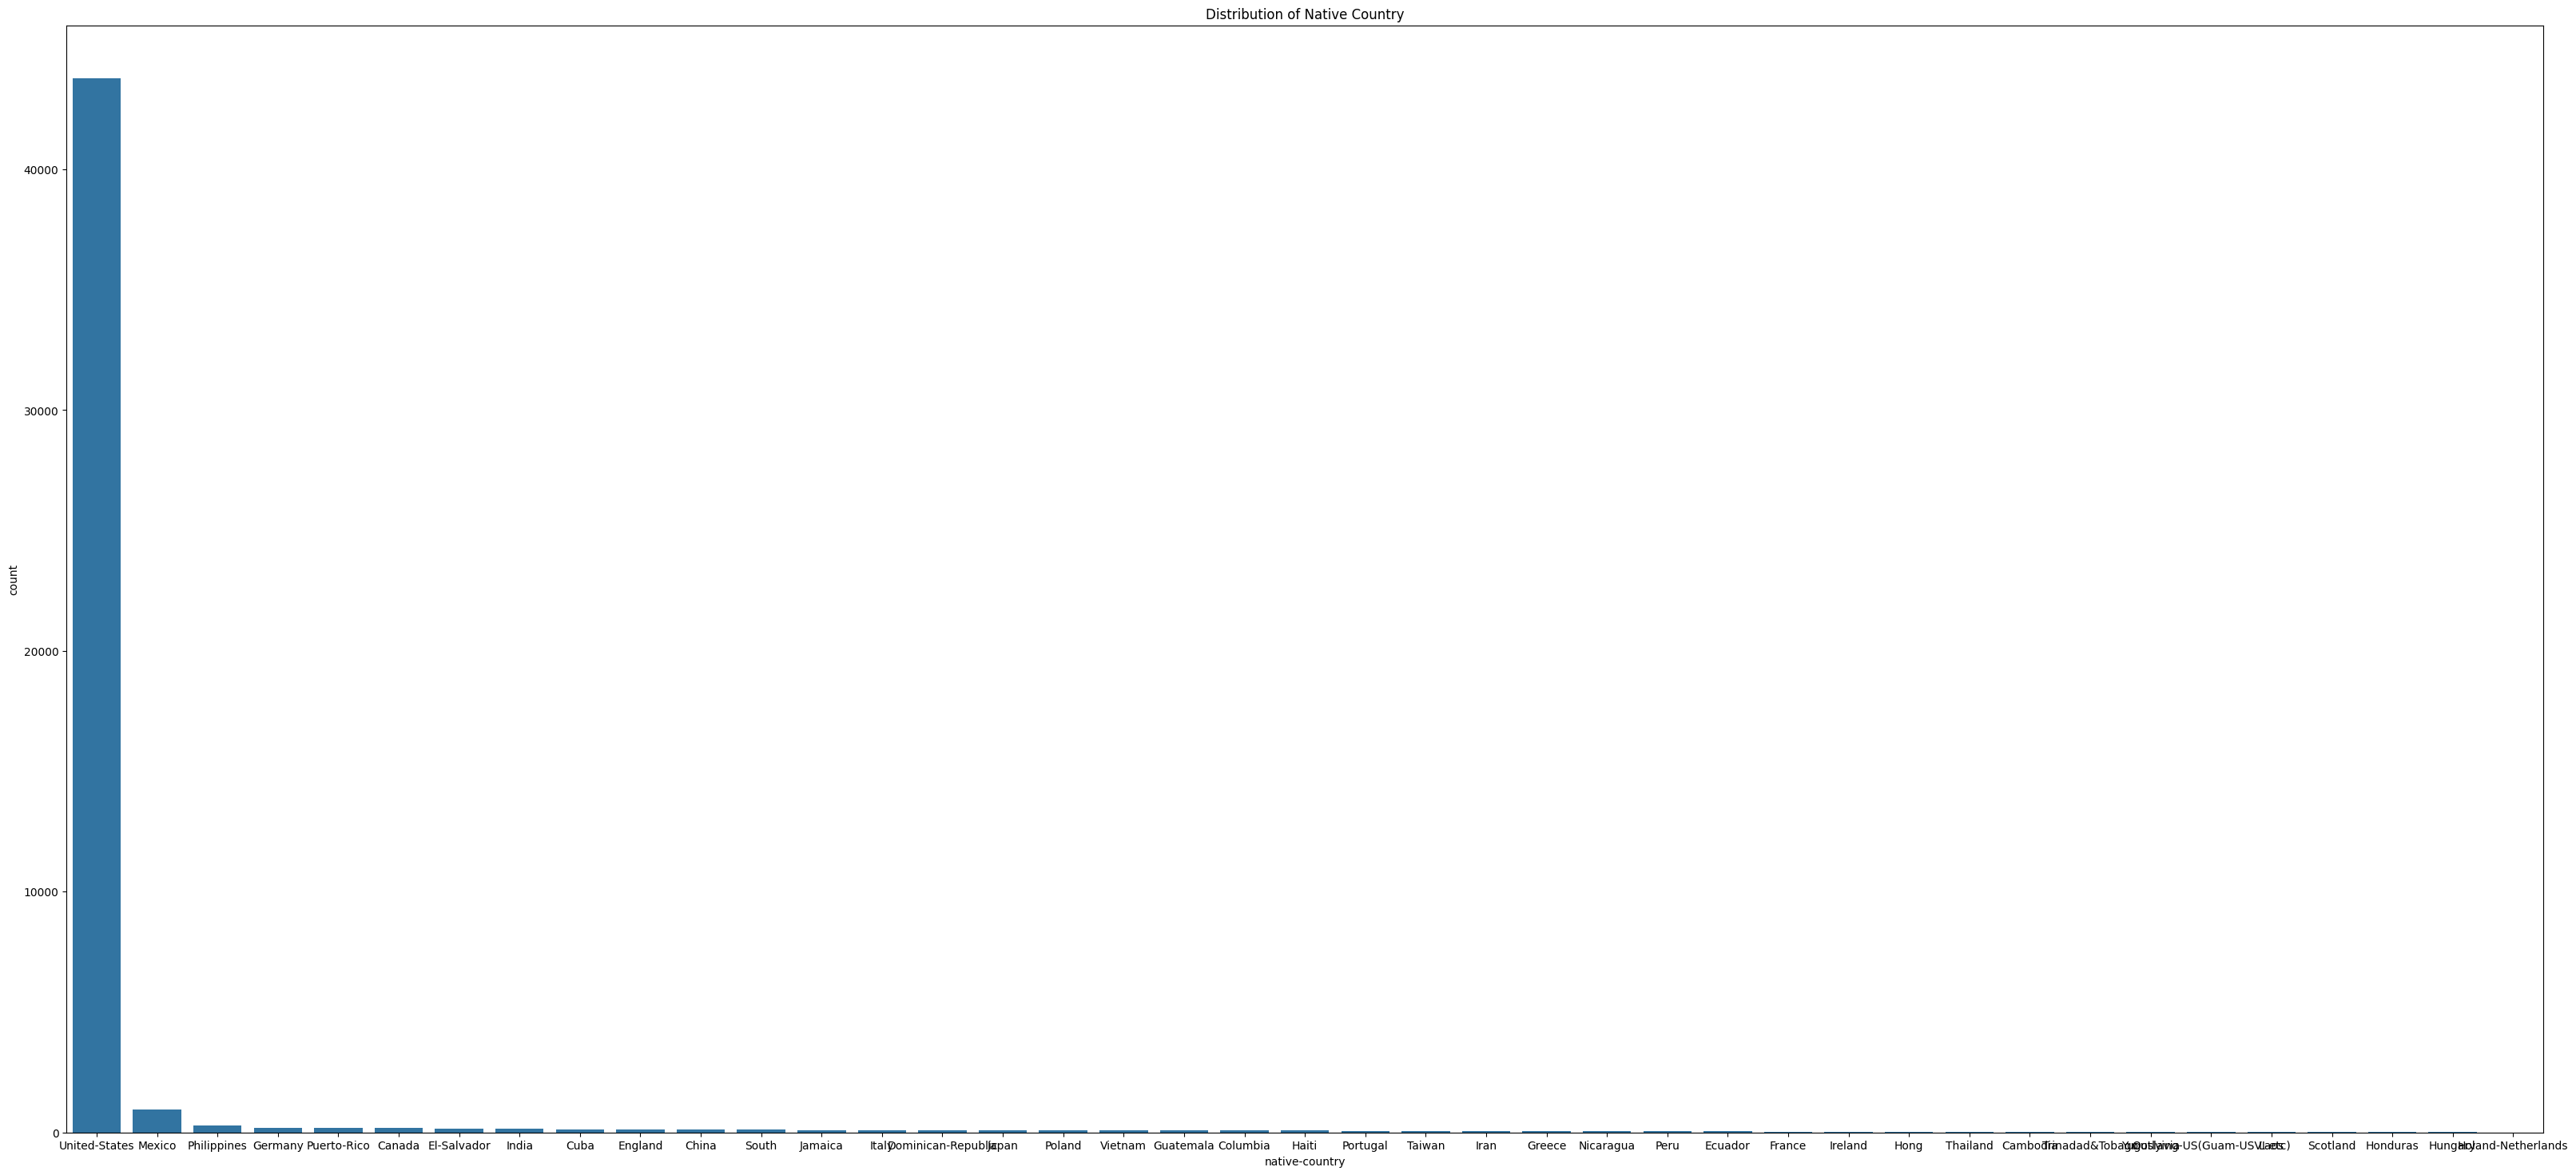

In [14]:
# Plot native-country distribution
plt.figure(figsize=(40, 18))
sns.countplot(x='native-country', order=df['native-country'].value_counts().index, data=df)
plt.title('Distribution of Native Country')
plt.show()

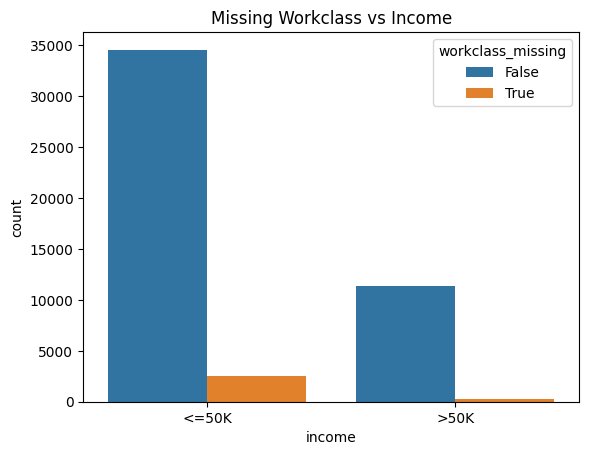

In [15]:
df['workclass_missing'] = df['workclass'].isnull()
sns.countplot(x='income', hue='workclass_missing', data=df)
plt.title('Missing Workclass vs Income')
plt.show()

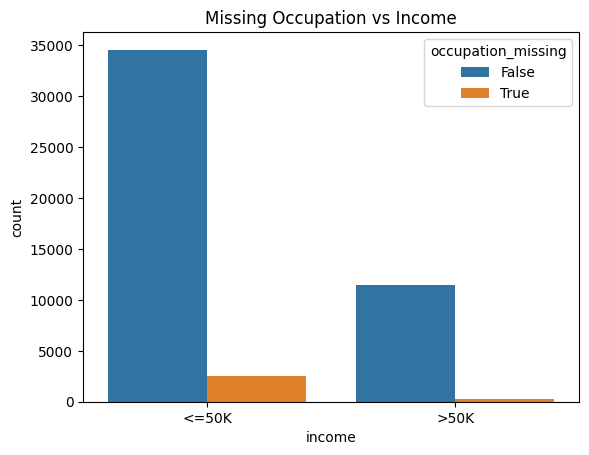

In [16]:
df['occupation_missing'] = df['occupation'].isnull()
sns.countplot(x='income', hue='occupation_missing', data=df)
plt.title('Missing Occupation vs Income')
plt.show()

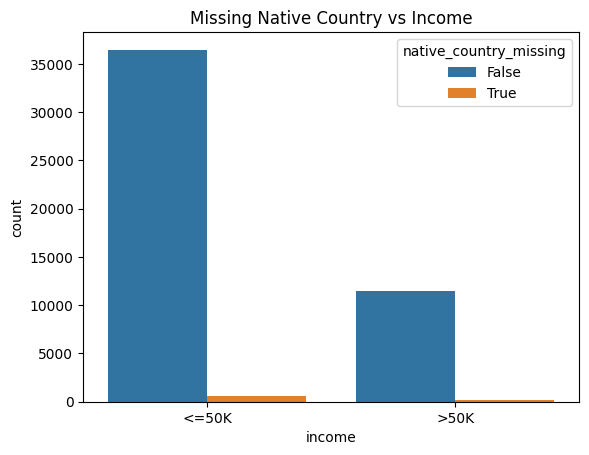

In [17]:
df['native_country_missing'] = df['native-country'].isnull()
sns.countplot(x='income', hue='native_country_missing', data=df)
plt.title('Missing Native Country vs Income')
plt.show()

In [18]:
# Fill native-country with United-States
native_country_mode = df['native-country'].mode()[0]
df['native-country'] = df['native-country'].fillna(native_country_mode)

In [19]:
# Fill workclass and occupation with Unknown
df['workclass'] = df['workclass'].fillna('Unknown')
df['occupation'] = df['occupation'].fillna('Unknown')

In [20]:
# recheck missing values
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
educational-num           0
marital-status            0
occupation                0
relationship              0
race                      0
gender                    0
capital-gain              0
capital-loss              0
hours-per-week            0
native-country            0
income                    0
workclass_missing         0
occupation_missing        0
native_country_missing    0
dtype: int64

In [21]:
# Map income to 0 and 1
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [22]:
X = df.drop('income', axis=1)  
y = df['income']               

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Define feature lists
numerical_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Numerical pipeline: scaling
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Categorical pipeline: one-hot encoding
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# The final pipeline
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

## Question: What preprocessing steps did you apply, and why?

### Answer:

I applied these preprocessing steps to prepare the data for modeling:

#### Handling Missing Values:
- **Native-country**: Filled missing values with United-States since it’s the most common value and missing data wasn’t strongly tied to income.  
- **Workclass and Occupation**: Filled missing values with Unknown because these gaps seemed related to income, and this avoided guessing wrong.  

#### Encoding the Target Variable:
- Changed income from text (<=50`, >50K) to numbers (0 and 1) so the model could use it.  

#### Splitting the Data:
- Split the data into training and testing sets to check how well the model works on new data.  

#### Feature Preprocessing:
- **Numerical Features**: Scaled them with StandardScaler (mean=0, variance=1) to help models like Logistic Regression work better.  
- **Categorical Features**: Used OneHotEncoder to turn categories into binary columns for the model to understand.  

#### Creating the final pipeline

## 🔍 Part 2: Model Building

### 🔹 2.1 Logistic Regression
- Build a baseline Logistic Regression model.
- **Experiment:** Tune the `C` parameter (regularization strength).

👉 **Question:** How does changing `C` affect the model’s performance?

In [24]:
# Logistic Regression baseline
logreg_pipeline_baseline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

logreg_pipeline_baseline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native-country'])])),
                ('classifier', LogisticRegression())])

In [33]:
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100]
}

grid_lr = GridSearchCV(logreg_pipeline_baseline, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categorie

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'educational-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'gender',
                                                                          'native-country'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [34]:
print("Best parameters for Logistic Regression:", grid_lr.best_params_)

Best parameters for Logistic Regression: {'classifier__C': 1}


### Logistic Regression Tuning Analysis

After tuning, the best parameter for `C` was found to be **C=1**. Since the default value of `C` in the `LogisticRegression` function is already **1**, there is no difference in performance before and after tuning.


### 🔹 2.2 K-Nearest Neighbors (KNN)
- Train a KNN model with a default `k=5`.
- **Experiment:**
   - Test different values of `k`.
   - Compare performance using `euclidean` vs. `manhattan` distance.

👉 **Question:** What is the best `k` for your dataset? Why did it perform better?

In [25]:
# KNN baseline (with default k=5 and euclidean distance)
knn_pipeline_baseline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

knn_pipeline_baseline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native-country'])])),
                ('classifier', KNeighborsClassifier())])

In [35]:
param_grid_knn = {
    'classifier__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'classifier__metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(knn_pipeline_baseline, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categorie

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'educational-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'gender',
                                                                          'native-country'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__metric': ['euclidean', 'manhattan'],
                         'classifier__n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                     15]},
             scoring='accuracy')

In [36]:
print("Best parameters for KNN:", grid_knn.best_params_)

Best parameters for KNN: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 13}


### K-Nearest Neighbors (KNN) Tuning Analysis

#### Best Parameters:
- **Metric:** Euclidean distance  
- **Number of Neighbors (k):** 13  


#### Best `k` Value:
The best value for `k` was **13**, meaning the model performed best when considering the **13 nearest neighbors** for classification.

#### Why Did It Perform Better?
1. **Reduced Overfitting:**  
   - A smaller `k` (e.g., 5) might have led to overfitting since it relies on very few neighbors, making predictions sensitive to noise.
   - A larger `k=13` smooths out decision boundaries, leading to better generalization.
  2. **Choice of Euclidean Distance:**  
   - The model performed better with **Euclidean distance**, likely because it accurately captures similarities in the feature space.


## 🌳 Part 3: Decision Tree with Pre-pruning & CCP (Post Pruning)
- Train a Decision Tree with default settings.
- Try pre-pruning hyperparameters.
- Check feature importance attribute.
- Extract `ccp_alpha` values using `cost_complexity_pruning_path`.
- Build pruned trees for different `ccp_alpha` values.

👉 **Question:** What pre-pruning hyperparameter did you tune? How did you change them to increase performance?

👉 **Question:** Which `ccp_alpha` value gave the best results, and why?

👉 **Question:** How did the tree size change after pruning?

In [26]:
# Decision Tree baseline
dt_pipeline_baseline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

dt_pipeline_baseline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native-country'])])),
                ('classifier', DecisionTreeClassifier())])

In [37]:
# Instantiate and fit a DecisionTreeClassifier to get the ccp_alphas
dt_temp = DecisionTreeClassifier(random_state=42)
dt_temp.fit(preprocessor.transform(X_train), y_train)
path = dt_temp.cost_complexity_pruning_path(preprocessor.transform(X_train), y_train)
ccp_alphas = path.ccp_alphas

In [38]:
# Exclude the maximum value that prunes the whole tree
param_grid_dt = {
    'classifier__ccp_alpha': ccp_alphas[:-1]
}

grid_dt = GridSearchCV(dt_pipeline_baseline, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categorie

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'educational-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'gender',
                                                                          'native-country'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__ccp_alpha': array([0.00000000e+00, 9.98523237e-06, 1.00650016e-05, ...,
       1.34602291e-02, 1.53636603e-02, 2.97398603e-02])},
             scoring='accuracy')

In [39]:
print("Best parameters for Decision Tree:", grid_dt.best_params_)

Best parameters for Decision Tree: {'classifier__ccp_alpha': 0.00016201602592256413}


### Decision Tree Tuning Analysis

#### Best Parameter:
- **Cost Complexity Pruning (`ccp_alpha`):** 0.00016201602592256413  

### **What pre-pruning hyperparameter did you tune? How did you change it to increase performance?**
I tuned the **`ccp_alpha`** parameter, which controls post-pruning by removing unnecessary branches.   
- By setting `ccp_alpha = 0.00016201602592256413`, the model became simpler and more generalizable, reducing false positives and increasing accuracy.

---

### **Which `ccp_alpha` value gave the best results, and why?**
The best `ccp_alpha` was **0.00016201602592256413**, as it balanced **tree complexity and generalization**.  
- A **lower alpha** results in a larger tree, capturing more patterns but also more noise.  
- A **higher alpha** prunes too aggressively, possibly losing important splits.  
- This specific value provided the **best trade-off**, increasing accuracy from **81% to 86%** by reducing false positives while maintaining true positive predictions.



## 🌲 Part 4: Random Forest
- Train a Random Forest model with 100 trees.
- **Experiment:** Vary `n_estimators` and `max_depth` and other hyperparameters.

👉 **Question:** How did changing these hyperparameters affect performance?

In [27]:
# Random Forest baseline (using 100 trees as default)
rf_pipeline_baseline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

rf_pipeline_baseline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native-country'])])),
                ('classifier', RandomForestClassifier())])

In [41]:
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(rf_pipeline_baseline, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categorie

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'educational-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'gender',
                                                                          'native-country'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [5, 10, 20],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [42]:
print("Best parameters for Random Forest:", grid_rf.best_params_)

Best parameters for Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}


### **Random Forest Tuning Analysis**

#### **Best Parameters:**
- `max_depth = 20` → Limits the depth of the trees to prevent overfitting.
- `min_samples_split = 10` → Ensures that a node must have at least 10 samples to be split.
- `n_estimators = 100` → Uses 100 decision trees in the ensemble.

### **How did changing these hyperparameters affect performance?**
- **Better Generalization**: The model correctly classifies more **negative cases** after tuning, reducing **false positives (516 → 337)**.  
- **Slightly Higher Accuracy**: Accuracy improved from **86% to 87%**, showing that tuning helped find a better balance.  
- **Trade-Off**: The number of **true positives decreased** slightly (1432 → 1344), but this suggests the model became more conservative, reducing misclassifications of negatives.  
- **Reduced Overfitting**: Setting `max_depth = 20` and `min_samples_split = 10` prevents overly complex trees, making the model more **generalizable** to unseen data.  


## 🧠 Part 5: Model Comparison and Optimization
- Compare all models using Accuracy, Precision, Recall, and F1-score.
- **Reflect:**
   - Which model performed best?
   - How did tuning improve performance?
   - What trade-offs (e.g., overfitting vs. underfitting) did you observe?

👉 **Question:** Summarize which model you would choose for this dataset and why.

In [28]:
# Create a dictionary to store performance for baseline models
baseline_results = {}

# List of baseline models
baseline_models = {
    'Logistic Regression': logreg_pipeline_baseline,
    'KNN': knn_pipeline_baseline,
    'Decision Tree': dt_pipeline_baseline,
    'Random Forest': rf_pipeline_baseline
}

for name, model in baseline_models.items():
    y_pred = model.predict(X_test)
    baseline_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-score': f1_score(y_test, y_pred, average='weighted')
    }

baseline_results_df = pd.DataFrame(baseline_results).T
print("Baseline Performance:")
print(baseline_results_df)

Baseline Performance:
                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.854683   0.847952  0.854683  0.848322
KNN                  0.833367   0.827933  0.833367  0.829966
Decision Tree        0.813691   0.814643  0.813691  0.814156
Random Forest        0.856323   0.850581  0.856323  0.851835


Model: Logistic Regression
Confusion Matrix:
[[6979  461]
 [ 957 1361]]

True Positives (TP): 1361
True Negatives (TN): 6979
False Positives (FP): 461
False Negatives (FN): 957
Accuracy: 0.85


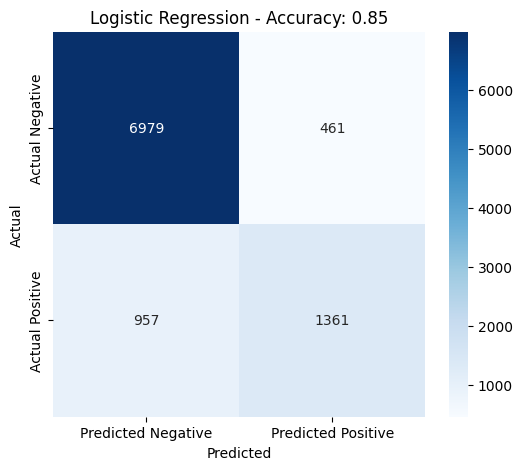

Model: KNN
Confusion Matrix:
[[6753  687]
 [ 939 1379]]

True Positives (TP): 1379
True Negatives (TN): 6753
False Positives (FP): 687
False Negatives (FN): 939
Accuracy: 0.83


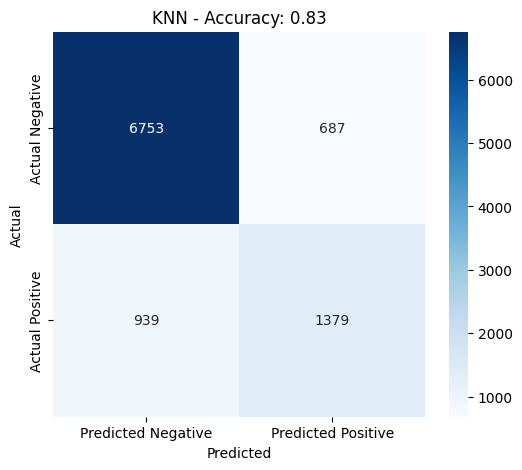

Model: Decision Tree
Confusion Matrix:
[[6514  926]
 [ 892 1426]]

True Positives (TP): 1426
True Negatives (TN): 6514
False Positives (FP): 926
False Negatives (FN): 892
Accuracy: 0.81


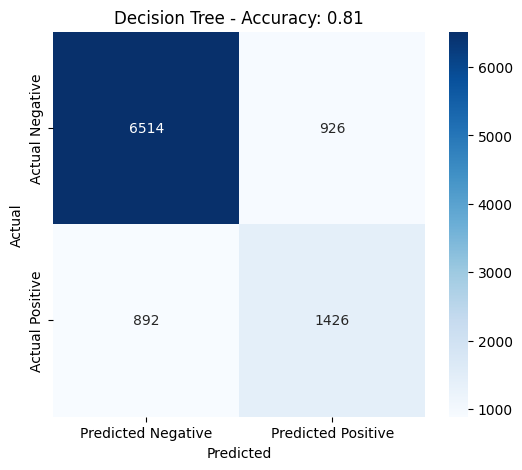

Model: Random Forest
Confusion Matrix:
[[6924  516]
 [ 886 1432]]

True Positives (TP): 1432
True Negatives (TN): 6924
False Positives (FP): 516
False Negatives (FN): 886
Accuracy: 0.86


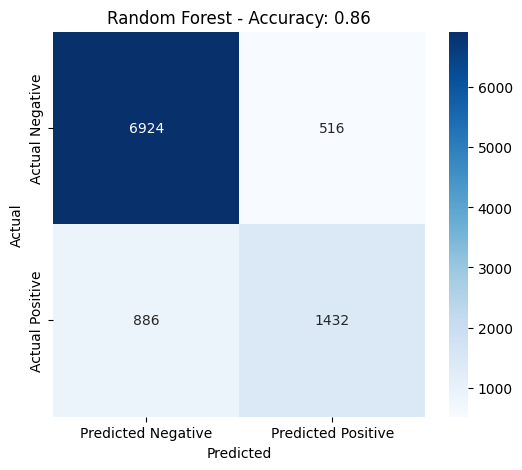

In [31]:
# Loop through each model
for name, model in baseline_models.items():
    # Get predictions
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Extract TP, TN, FP, FN
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    
    # Compute accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Print confusion matrix and extracted values
    print(f"Model: {name}")
    print("Confusion Matrix:")
    print(cm)
    print("\nTrue Positives (TP):", TP)
    print("True Negatives (TN):", TN)
    print("False Positives (FP):", FP)
    print("False Negatives (FN):", FN)
    print(f"Accuracy: {acc:.2f}")
    print("=" * 50)
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Predicted Negative", "Predicted Positive"], 
                yticklabels=["Actual Negative", "Actual Positive"])
    plt.title(f"{name} - Accuracy: {acc:.2f}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [45]:
# Create a dictionary to store performance for tuned models
tuned_results = {}

tuned_models = {
    'Logistic Regression': grid_lr.best_estimator_,
    'KNN': grid_knn.best_estimator_,
    'Decision Tree': grid_dt.best_estimator_,
    'Random Forest': grid_rf.best_estimator_
}

for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    tuned_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-score': f1_score(y_test, y_pred, average='weighted')
    }

tuned_results_df = pd.DataFrame(tuned_results).T
print("tuned Performance:")
print(tuned_results_df)

tuned Performance:
                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.854683   0.847952  0.854683  0.848322
KNN                  0.840131   0.834016  0.840131  0.835976
Decision Tree        0.862164   0.856367  0.862164  0.854204
Random Forest        0.865649   0.860434  0.865649  0.857706


Model: Logistic Regression
Confusion Matrix:
[[6979  461]
 [ 957 1361]]

True Positives (TP): 1361
True Negatives (TN): 6979
False Positives (FP): 461
False Negatives (FN): 957
Accuracy: 0.85


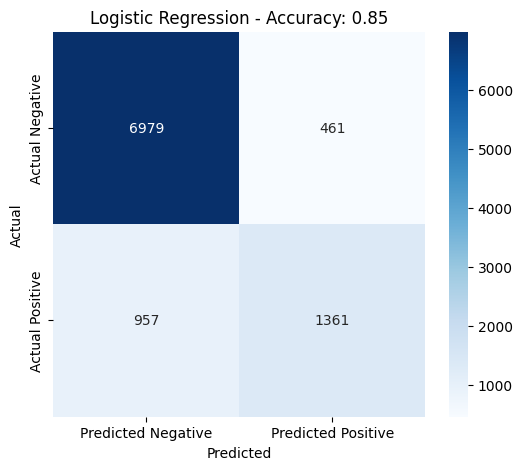

Model: KNN
Confusion Matrix:
[[6817  623]
 [ 937 1381]]

True Positives (TP): 1381
True Negatives (TN): 6817
False Positives (FP): 623
False Negatives (FN): 937
Accuracy: 0.84


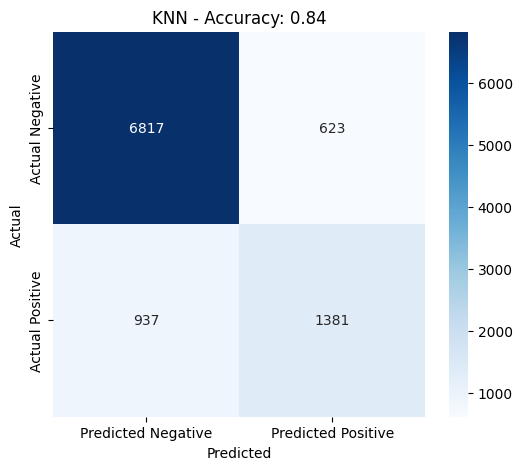

Model: Decision Tree
Confusion Matrix:
[[7080  360]
 [ 985 1333]]

True Positives (TP): 1333
True Negatives (TN): 7080
False Positives (FP): 360
False Negatives (FN): 985
Accuracy: 0.86


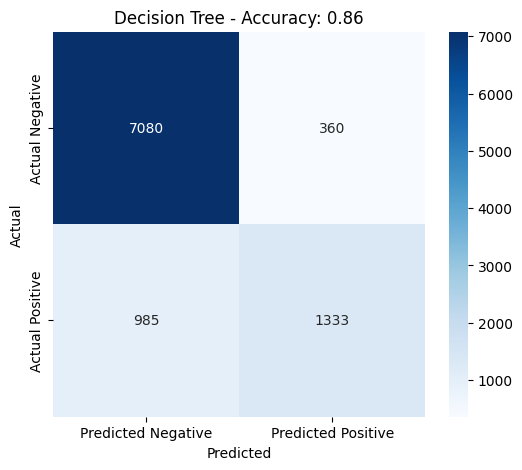

Model: Random Forest
Confusion Matrix:
[[7103  337]
 [ 974 1344]]

True Positives (TP): 1344
True Negatives (TN): 7103
False Positives (FP): 337
False Negatives (FN): 974
Accuracy: 0.87


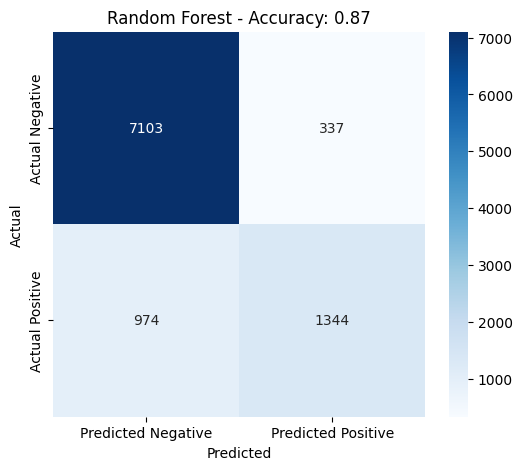

In [ ]:
# Loop through each tuned model
for name, model in tuned_models.items():
    # Get predictions on test set
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Extract TP, TN, FP, FN 
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Print results
    print(f"Model: {name}")
    print("Confusion Matrix:")
    print(cm)
    print("\nTrue Positives (TP):", TP)
    print("True Negatives (TN):", TN)
    print("False Positives (FP):", FP)
    print("False Negatives (FN):", FN)
    print(f"Accuracy: {acc:.2f}")
    print("=" * 50)
    
    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])
    plt.title(f"{name} - Accuracy: {acc:.2f}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

### **Final Model Selection: Which Model is Best?**

#### **Final Choice: Random Forest**
The **Random Forest model is the best choice** for this dataset. Here's why:

- **Highest Accuracy (87%)**: It outperforms the other models in classification accuracy.  
- **Balanced Precision & Recall**: This means it effectively identifies both positive and negative cases with fewer misclassifications.  
- **Better Generalization**: The model avoids overfitting due to multiple trees, making it more stable on unseen data.   


## ⭐ Stretch Goal (Optional):
- Use **GridSearchCV** or **RandomizedSearchCV** to fully optimize one model and retrieve best parameters and best model for each.
- Visualize **feature importance** (especially for Decision Tree/Random Forest).

👉 **Bonus Question:** Did advanced tuning or feature importance insights change your final model choice?